In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
pd.set_option('display.max_columns', 110)
   

In [2]:
v_data = pd.read_csv('../data/whd_whisard.csv', dtype={'naic_cd':str})

In [3]:
v_data.head()

,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,cmp_assd_cnt,ee_violtd_cnt,bw_atp_amt,ee_atp_cnt,findings_start_date,findings_end_date,flsa_violtn_cnt,flsa_repeat_violator,flsa_bw_atp_amt,flsa_ee_atp_cnt,flsa_mw_bw_atp_amt,flsa_ot_bw_atp_amt,flsa_15a3_bw_atp_amt,flsa_cmp_assd_amt,sca_violtn_cnt,sca_bw_atp_amt,sca_ee_atp_cnt,mspa_violtn_cnt,mspa_bw_atp_amt,mspa_ee_atp_cnt,mspa_cmp_assd_amt,h1b_violtn_cnt,h1b_bw_atp_amt,h1b_ee_atp_cnt,h1b_cmp_assd_amt,fmla_violtn_cnt,fmla_bw_atp_amt,fmla_ee_atp_cnt,fmla_cmp_assd_amt,flsa_cl_violtn_cnt,flsa_cl_minor_cnt,flsa_cl_cmp_assd_amt,dbra_cl_violtn_cnt,dbra_bw_atp_amt,dbra_ee_atp_cnt,h2a_violtn_cnt,h2a_bw_atp_amt,h2a_ee_atp_cnt,h2a_cmp_assd_amt,flsa_smw14_violtn_cnt,flsa_smw14_bw_amt,flsa_smw14_ee_atp_cnt,cwhssa_violtn_cnt,cwhssa_bw_amt,cwhssa_ee_cnt,osha_violtn_cnt,osha_bw_atp_amt,osha_ee_atp_cnt,osha_cmp_assd_amt,eppa_violtn_cnt,eppa_bw_atp_amt,eppa_ee_cnt,eppa_cmp_assd_amt,h1a_violtn_cnt,h1a_bw_atp_amt,h1a_ee_atp_cnt,h1a_cmp_assd_amt,crew_violtn_cnt,crew_bw_atp_amt,crew_ee_atp_cnt,crew_cmp_assd_amt,ccpa_violtn_cnt,ccpa_bw_atp_amt,ccpa_ee_atp_cnt,flsa_smwpw_violtn_cnt,flsa_smwpw_bw_atp_amt,flsa_smwpw_ee_atp_cnt,flsa_hmwkr_violtn_cnt,flsa_hmwkr_bw_atp_amt,flsa_hmwkr_ee_atp_cnt,flsa_hmwkr_cmp_assd_amt,ca_violtn_cnt,ca_bw_atp_amt,ca_ee_atp_cnt,pca_violtn_cnt,pca_bw_atp_amt,pca_ee_atp_cnt,flsa_smwap_violtn_cnt,flsa_smwap_bw_atp_amt,flsa_smwap_ee_atp_cnt,flsa_smwft_violtn_cnt,flsa_smwft_bw_atp_amt,flsa_smwft_ee_atp_cnt,flsa_smwl_violtn_cnt,flsa_smwl_bw_atp_amt,flsa_smwl_ee_atp_cnt,flsa_smwmg_violtn_cnt,flsa_smwmg_bw_atp_amt,flsa_smwmg_ee_atp_cnt,flsa_smwsl_violtn_cnt,flsa_smwsl_bw_atp_amt,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt
0,1782787,Trojan Labor,Bernie's World LLC,930 N Belt Line Rd Ste 102,Irving,TX,75061.0,561320,Temporary Help Services,0,0.0,0,0.00,0,2014-04-08,2016-04-07,0,NaN,0.00,0,0.00,0.00,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,2017-03-14 01:00:03.836000 AMERICA/NEW_YORK
1,1791386,IHOP #3467,Chicken LLC,901 Westside Drive,Durant,OK,74701.0,722211,Limited-Service Restaurants,145,0.0,103,8844.82,103,2013-11-05,2015-11-04,145,R,8844.82,103,8131.01,713.81,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,2017-03-14 01:00:03.836000 AMERICA/NEW_YORK
2,1793850,Brasil Cafe,Brasil LLC,2604 Dunlavy Street,Houston,TX,77006.0,722211,Limited-Service Restaurants,2,0.0,0,0.00,0,2014-08-03,2016-07-31,2,NaN,0.00,0,0.00,0.00,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,2017-03-14 01:00:03.836000 AMERICA/NEW_YORK
3,1794281,Copperfalls Aveda Spa & Salon,"Copperfalls, Inc.","340 Perry St, #200",Castle Rock,CO,80104.0,812113,Nail Salons,1,0.0,0,0.00,0,2014-07-19,2016-07-18,1,NaN,0.00,0,0.00,0.00,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,2017-03-14 01:00:03.836000 AMERICA/NEW_YORK
4,1794652,Mr. Spots,Lex Loci Corporation,206 N. Main St.,Bowling Green,OH,43402.0,722110,Full-Service Restaurants,1,0.0,0,0.00,0,2014-06-21,2016-06-20,1,NaN,0.00,0,0.00,0.00,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0

## We filtered out Arizona from the national data. 

In [6]:
az_vdata = v_data[v_data['st_cd']=='AZ']

## Here, we filtered out instances where there were H2A violations in the Arizona data frame. 

In [19]:
azh2a = az_vdata.iloc[az_vdata['h2a_violtn_cnt'].nonzero()]

## We got rid of the columns that we deemed irrelevant to our analysis. We checked for relevance by running a describe function in all the fields and only selecting those that had non-zero values.  

In [33]:
new_azh2a = azh2a[['case_id','trade_nm','legal_name','street_addr_1_txt',
'cty_nm','st_cd',
'zip_cd',
'naic_cd',
'naics_code_description',
'case_violtn_cnt',
'cmp_assd_cnt',
'ee_violtd_cnt',
'bw_atp_amt',
'ee_atp_cnt',
'findings_start_date',
'findings_end_date','flsa_violtn_cnt','mspa_violtn_cnt','mspa_bw_atp_amt',
                  'mspa_ee_atp_cnt','mspa_cmp_assd_amt','h2a_violtn_cnt','h2a_bw_atp_amt',
                   'h2a_ee_atp_cnt','h2a_cmp_assd_amt']]
    

## We made a pivot table analyzing all the relevant fields of interest. This resulted in a very significant (and the only interesting) finding. Violations involving nearly 600 employees resulted in the assessing of a $1.5 million fine -- far and away the largest among the 17 H2A violators we found. 

In [74]:
pt_azh2a = pd.pivot_table(new_azh2a, 
                         index = 'trade_nm', 
                         values = ['case_violtn_cnt','cmp_assd_cnt',
                                   'ee_violtd_cnt', 'bw_atp_amt',
                                   'ee_atp_cnt','flsa_violtn_cnt'],
                         aggfunc = 'sum').sort_values(by='cmp_assd_cnt',ascending =False)
pt_azh2a

,bw_atp_amt,case_violtn_cnt,cmp_assd_cnt,ee_atp_cnt,ee_violtd_cnt,flsa_violtn_cnt
trade_nm,,,,,,
Eurofresh,937690.00,1410,1507900.0,557,855,0
"S & H Farm Labor, LLC",44640.00,566,84900.0,283,283,0
"Auza Ranches, LLC",242775.11,58,55500.0,45,45,0
"Escamilla & Sons, Inc.",160878.08,1140,39850.0,474,717,0
Union Harvest,24117.39,130,34325.0,103,103,0
"The Growers Co, Inc",35982.18,88,26100.0,40,40,0
Maratori Farms,3092.54,21,18900.0,20,20,0
"Chavez Harvesting, LLC",77371.10,99,15725.0,53,86,0
Fondomonte Arizona LLC AGER,0.00,4,12817.6,0,0,0


In [75]:
pt_azh2a

,bw_atp_amt,case_violtn_cnt,cmp_assd_cnt,ee_atp_cnt,ee_violtd_cnt,flsa_violtn_cnt
trade_nm,,,,,,
Eurofresh,937690.00,1410,1507900.0,557,855,0
"S & H Farm Labor, LLC",44640.00,566,84900.0,283,283,0
"Auza Ranches, LLC",242775.11,58,55500.0,45,45,0
"Escamilla & Sons, Inc.",160878.08,1140,39850.0,474,717,0
Union Harvest,24117.39,130,34325.0,103,103,0
"The Growers Co, Inc",35982.18,88,26100.0,40,40,0
Maratori Farms,3092.54,21,18900.0,20,20,0
"Chavez Harvesting, LLC",77371.10,99,15725.0,53,86,0
Fondomonte Arizona LLC AGER,0.00,4,12817.6,0,0,0


In [80]:
eurofresh = az_vdata[az_vdata['legal_name'].str.contains('eurofre', case = False, na = False)]

## We figured if this company broke the law in one way, it might have done so in other ways. However, we found that our assumption was wrong. The H2A violations appear to be the only instance in which Eurofresh was fined. 

In [82]:
eurofresh['cmp_assd_cnt']

188643    1507900.0
212317          0.0
Name: cmp_assd_cnt, dtype: float64

In [90]:
pt_azh2a.reset_index(inplace = True)
pt_azh2a

,trade_nm,bw_atp_amt,case_violtn_cnt,cmp_assd_cnt,ee_atp_cnt,ee_violtd_cnt,flsa_violtn_cnt
0,Eurofresh,937690.00,1410,1507900.0,557,855,0
1,"S & H Farm Labor, LLC",44640.00,566,84900.0,283,283,0
2,"Auza Ranches, LLC",242775.11,58,55500.0,45,45,0
3,"Escamilla & Sons, Inc.",160878.08,1140,39850.0,474,717,0
4,Union Harvest,24117.39,130,34325.0,103,103,0
5,"The Growers Co, Inc",35982.18,88,26100.0,40,40,0
6,Maratori Farms,3092.54,21,18900.0,20,20,0
7,"Chavez Harvesting, LLC",77371.10,99,15725.0,53,86,0
8,Fondomonte Arizona LLC AGER,0.00,4,12817.6,0,0,0
9,Dragoon Mt. Vinyard,0.00,29,11200.0,0,7,0


In [115]:
pt_azh2a.rename(columns = {'cmp_assd_cnt' : 'Civil Penalty', 'trade_nm' : 'Company'}, inplace = True)

## As you can see, when it comes to H2A related violations, Eurofresh is an industry leader in Arizona. 

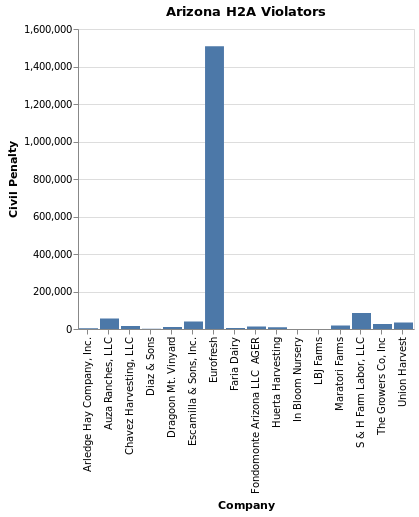

In [137]:
alt.Chart(pt_azh2a, 
         title = 'Arizona H2A Violators').mark_bar().encode(x = 'Company', y = 'Civil Penalty')

In [102]:
Nat_h2av = v_data.iloc[v_data['h2a_violtn_cnt'].nonzero()]

In [103]:
Nat_h2av = Nat_h2av[['trade_nm','legal_name','cty_nm','st_cd','cmp_assd_cnt']]

## But how do they stack up nationally? (someone drumroll please)

In [104]:
pt_natv = pd.pivot_table(Nat_h2av,
                        index = 'trade_nm',
                        values = 'cmp_assd_cnt',
                        aggfunc = 'sum').sort_values(by='cmp_assd_cnt',ascending =False)
pt_natv

,cmp_assd_cnt
trade_nm,
"Peri & Sons Farm, Inc.",3129900.0
Eurofresh,1507900.0
A. Oseguera Company,749400.0
"Cascade Holdings Group, LP",594900.0
"Sierra Cascade Nursery, Inc",569650.0
JR Custom Harvesting Company,439950.0
"Global Horizons Manpower, Inc.",420800.0
Adams Land & Cattle Co.,409450.0
Randy Clanton Farms,339150.0


In [107]:
top10 = pt_natv.head(10)

In [110]:
top10.reset_index(inplace = True)


In [118]:
top10.rename(columns = {'trade_nm' : 'Company', 'cmp_assd_cnt' : 'Civil Penalty'}, inplace = True)

/home/newshack/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## VERY WELL! (if by well we mean adept at violating labor law)

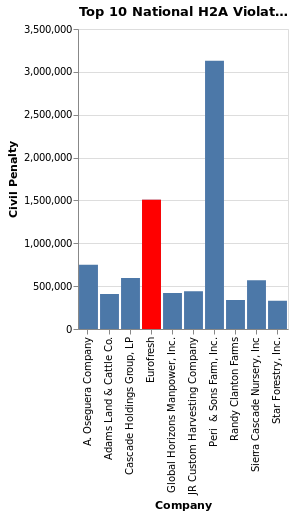

In [133]:
top_ten = alt.Chart(top10,
         title = 'Top 10 National H2A Violators').mark_bar().encode(x = 'Company', y = 'Civil Penalty')
from altair import datum
eurofresh_chart = alt.Chart(top10,
         ).mark_bar( color = 'red').encode(x = 'Company', y = 'Civil Penalty',).transform_filter(datum.Company == 'Eurofresh')

top_ten + eurofresh_chart

## But wait! There's more! While Eurofresh paid 1.5 million, that was actually negotiated down from an original figure of 6 million. The company in first - Peri & Sons - did not negotiate, and paid the original fine. So, Eurofresh is actually the worst, or best depending on whether you're a shareholder. Eurobest? More like Eurotrash.